<h1 align = "center">Homework5: Convolutional Neural Networks </h1>

### CS3210: Machine Learning
### Instructor: Feng Jiang 

#### Author: Ling Thang

**Assigned: April 11, 2021**  
**Due: April 21, 2021**

---

<h1 align = "center">Assignment Specifications </h1>

**Design your own CNN structure:**
- (# of convolutional layers, # of fully connected layers, # of filters, size of the filters )
- At least two convolutional layers
- Max pooling at least once
- Use one time "Drop Out" by 50% in one of the fully connected layers.
- Write (or draw) down the structure of your CNN in report/colab notebook
- Write down the batch size and epoch number in report/colab notebook
- Report the performance of the model in report/colab notebook.


In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

# keras 
from keras import layers, models, optimizers
from keras.datasets import mnist
import tensorflow as tf


In [2]:
# import MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model2 = models.Sequential
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # convolutional layer with 32 filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer with 64 filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

#test_loss, test_acc = model.evaluate(test_images, test_labels)

#print('Test accuracy:', test_acc)

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

print("number of trainable parameters: ", model.count_params())
print("number of samples: ", len(train_images))
print("number of layers: ", len(model.layers))
print("number of epochs: ", len(history.epoch))
print("number of validation steps: ", len(history.history['val_loss']))
print("number of training steps: ", len(history.history['loss']))
print("number of validation accuracy: ", len(history.history['val_accuracy']))
print("number of training accuracy: ", len(history.history['accuracy']))
print("number of validation loss: ", len(history.history['val_loss']))
print("number of training loss: ", len(history.history['loss']))

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7884 - loss: 0.6445 - val_accuracy: 0.9803 - val_loss: 0.0667
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9684 - loss: 0.1052 - val_accuracy: 0.9856 - val_loss: 0.0474
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9771 - loss: 0.0744 - val_accuracy: 0.9882 - val_loss: 0.0430
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.9892 - val_loss: 0.0388
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9874 - val_loss: 0.0406
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0376
Test accuracy: 0.9904000163078308
Test loss: 0.031256355345249176
number of trainable parameters:  232650
number of samples:  60000
number of layers:  9
number of epochs:  5
number of validation steps:  5
number of training steps:  5
number of validation accuracy:  5
number of trainin

You must install pydot (`pip install pydot`) for `plot_model` to work.


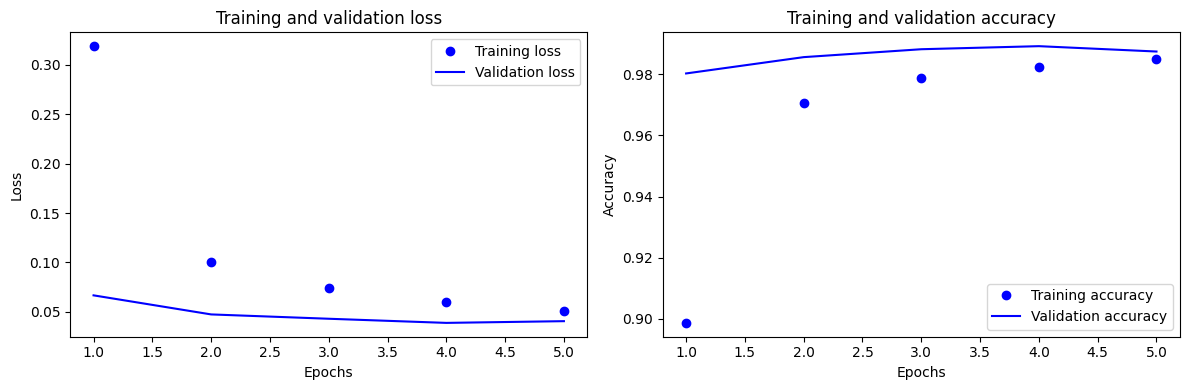

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


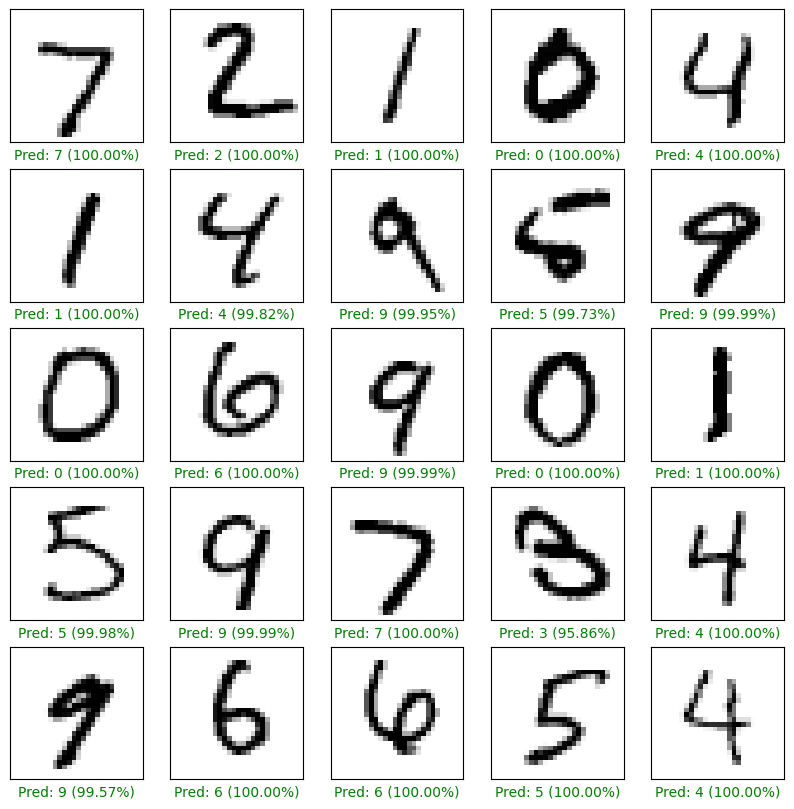

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Visualize training progress
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize feature maps (optional)
# You can extract feature maps using model.layers and visualize them using Matplotlib

# Visualize model predictions
predictions = model.predict(test_images)
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} ({100*np.max(predictions[i]):.2f}%)', color=color)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0376
Test accuracy: 0.9904000163078308
Test loss: 0.031256355345249176
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.1756974e-09 4.6598362e-07 3.8800684e-07 3.2470490e-07 2.8061471e-09
 4.1671486e-10 9.8077048e-13 9.9999857e-01 4.6321499e-10 2.5969109e-07]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


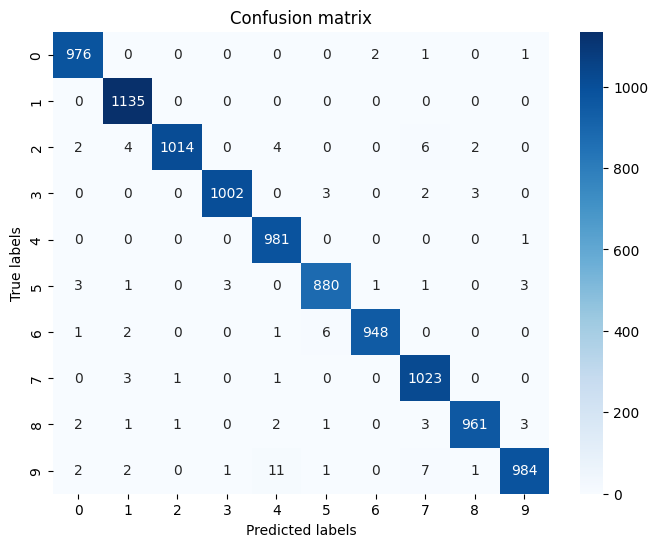

In [8]:
import visualkeras as vk 


# Save the model
model.save('mnist_model.h5')

# Load the model
model = models.load_model('mnist_model.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


